In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


## Load data

In [3]:
features = ['id','cycle','setting1','setting2','setting3','s1','s2', 
            's3', 's4','s5', 's6',  's7', 's8', 's9','s10', 
            's11', 's12', 's13', 's14', 's15',  's16',
            's17', 's18', 's19',  's20', 's21']
datatrain = pd.read_csv('data/train.csv')
datatest = pd.read_csv('data/test.csv')
RUL = datatest['ttf']

## view statistics 

In [4]:
datatrain[features].head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [5]:
datatest[features].head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,31,-0.0006,0.0004,100.0,518.67,642.58,1581.22,1398.91,14.62,...,521.79,2388.06,8130.11,8.4024,0.03,393,2388,100.0,38.81,23.3552
1,2,49,0.0018,-0.0001,100.0,518.67,642.55,1586.59,1410.83,14.62,...,521.74,2388.09,8126.90,8.4505,0.03,391,2388,100.0,38.81,23.2618
2,3,126,-0.0016,0.0004,100.0,518.67,642.88,1589.75,1418.89,14.62,...,520.83,2388.14,8131.46,8.4119,0.03,395,2388,100.0,38.93,23.2740
3,4,106,0.0012,0.0004,100.0,518.67,642.78,1594.53,1406.88,14.62,...,521.88,2388.11,8133.64,8.4634,0.03,395,2388,100.0,38.58,23.2581
4,5,98,-0.0013,-0.0004,100.0,518.67,642.27,1589.94,1419.36,14.62,...,521.00,2388.15,8125.74,8.4362,0.03,394,2388,100.0,38.75,23.4117


In [6]:
datatrain[features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
cycle,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
setting1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
setting2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
setting3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
s1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
s2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
s3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
s4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
s5,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200


In [7]:
datatrain[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        20631 non-null  int64  
 1   cycle     20631 non-null  int64  
 2   setting1  20631 non-null  float64
 3   setting2  20631 non-null  float64
 4   setting3  20631 non-null  float64
 5   s1        20631 non-null  float64
 6   s2        20631 non-null  float64
 7   s3        20631 non-null  float64
 8   s4        20631 non-null  float64
 9   s5        20631 non-null  float64
 10  s6        20631 non-null  float64
 11  s7        20631 non-null  float64
 12  s8        20631 non-null  float64
 13  s9        20631 non-null  float64
 14  s10       20631 non-null  float64
 15  s11       20631 non-null  float64
 16  s12       20631 non-null  float64
 17  s13       20631 non-null  float64
 18  s14       20631 non-null  float64
 19  s15       20631 non-null  float64
 20  s16       20631 non-null  fl

In [8]:
RUL.head()

0    112
1     98
2     69
3     82
4     91
Name: ttf, dtype: int64

## removed flat lines

In [9]:
col_names = ['id','cycle','setting1','setting2','s2', 's3', 's4', 's6',  's7', 's8', 's9',
            's11', 's12', 's13', 's14', 's15',  's17',   's20', 's21']
data_train = datatrain[col_names]
data_test = datatest[col_names]

data_train.columns = col_names
data_test.columns = col_names

## data visualization

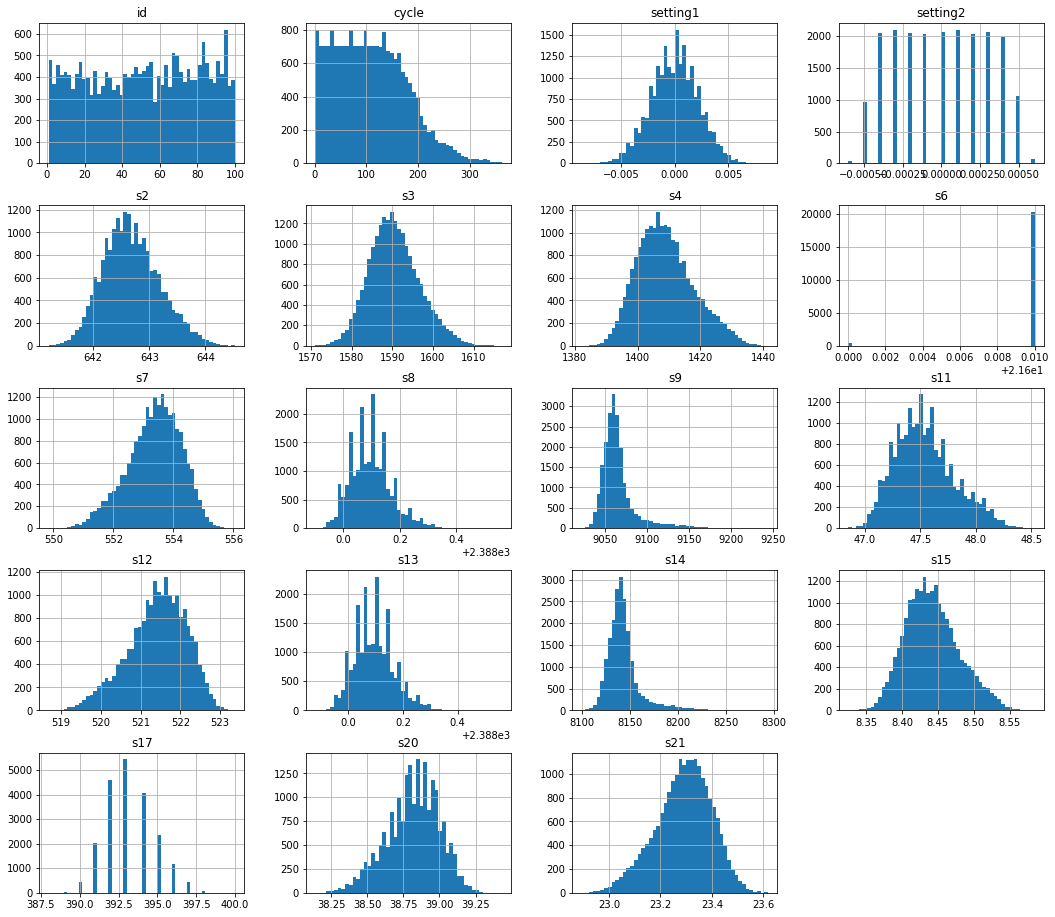

In [10]:
data_train.hist(bins=50, figsize=(18,16))
plt.show()

In [11]:
cyclestrain = data_train.groupby('id', as_index=False)['cycle'].max()
cyclestest = data_test.groupby('id', as_index=False)['cycle'].max()

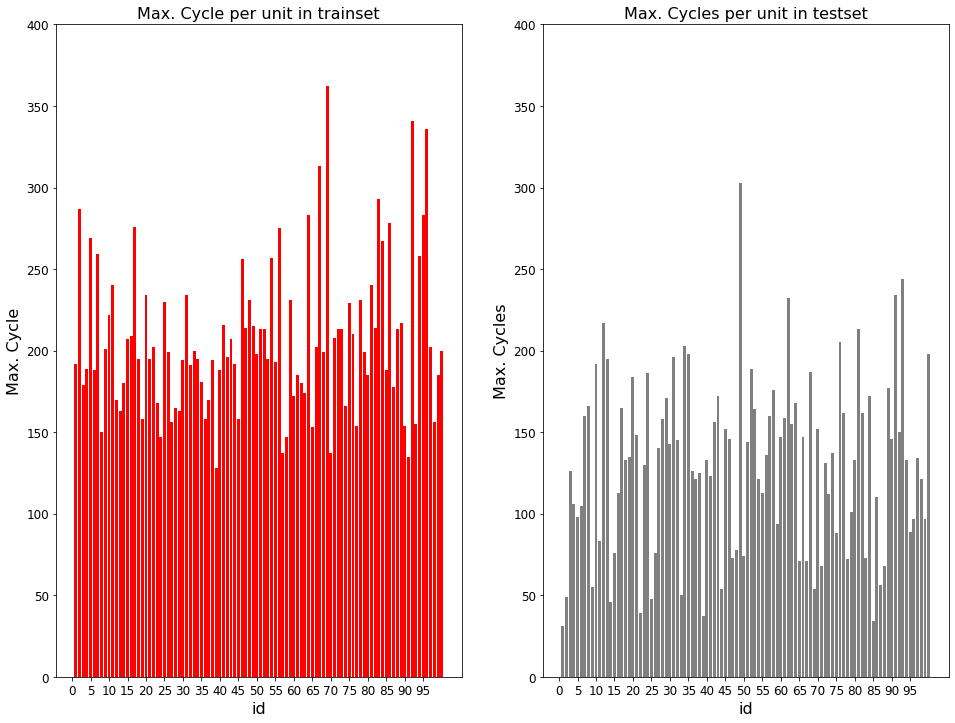

In [12]:
fig = plt.figure(figsize = (16,12))
fig.add_subplot(1,2,1)
bar_labels = list(cyclestrain['id'])
bars = plt.bar(list(cyclestrain['id']), cyclestrain['cycle'], color='red')
plt.ylim([0, 400])
plt.xlabel('id', fontsize=16)
plt.ylabel('Max. Cycle', fontsize=16)
plt.title('Max. Cycle per unit in trainset', fontsize=16)
plt.xticks(np.arange(min(bar_labels)-1, max(bar_labels)-1, 5.0), fontsize=12)
plt.yticks(fontsize=12)
fig.add_subplot(1,2,2)
bars = plt.bar(list(cyclestest['id']), cyclestest['cycle'], color='grey')
plt.ylim([0, 400])
plt.xlabel('id', fontsize=16)
plt.ylabel('Max. Cycles', fontsize=16)
plt.title('Max. Cycles per unit in testset', fontsize=16)
plt.xticks(np.arange(min(bar_labels)-1, max(bar_labels)-1, 5.0), fontsize=12)
plt.yticks(fontsize=12)
plt.show()

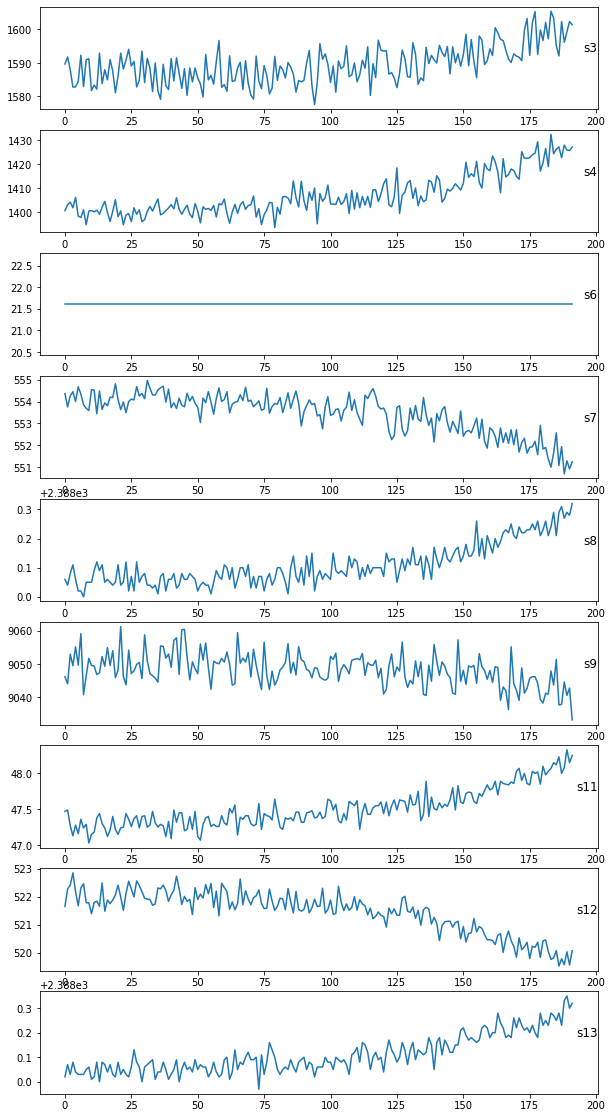

In [13]:
values = data_train[data_train.id==1].values
groups = [5, 6, 7, 8, 9, 10, 11,12,13]
i = 1
plt.figure(figsize=(10,20))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(data_train.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

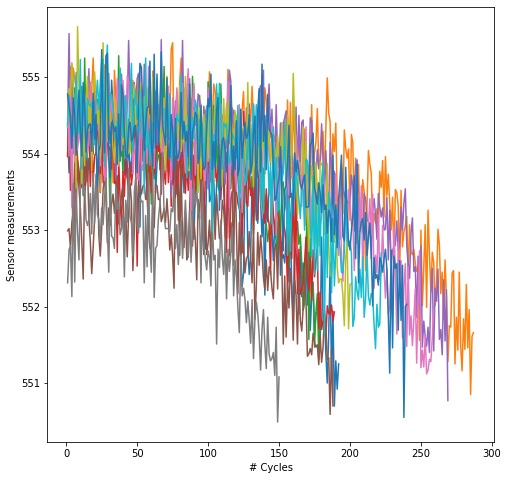

In [14]:
plt.figure(figsize = (8, 8))
plt.plot(data_train[data_train.id==1].cycle, data_train[data_train.id==1].s7)
plt.plot(data_train[data_train.id==2].cycle, data_train[data_train.id==2].s7)
plt.plot(data_train[data_train.id==3].cycle, data_train[data_train.id==3].s7)
plt.plot(data_train[data_train.id==4].cycle, data_train[data_train.id==4].s7)
plt.plot(data_train[data_train.id==5].cycle, data_train[data_train.id==5].s7)
plt.plot(data_train[data_train.id==6].cycle, data_train[data_train.id==6].s7)
plt.plot(data_train[data_train.id==7].cycle, data_train[data_train.id==7].s7)
plt.plot(data_train[data_train.id==8].cycle, data_train[data_train.id==8].s7)
plt.plot(data_train[data_train.id==9].cycle, data_train[data_train.id==9].s7)
plt.plot(data_train[data_train.id==10].cycle, data_train[data_train.id==10].s7)
plt.plot(data_train[data_train.id==11].cycle, data_train[data_train.id==11].s7)

plt.xlabel('# Cycles')
plt.ylabel('Sensor measurements')
plt.show()

## Establishing remaining life in cycles

In [15]:
data_train = pd.merge(data_train, data_train.groupby('id', as_index=False)['cycle'].max(), how='left', on='id')


In [16]:
data_train.rename(columns={"cycles_x": "cycle", "cycles_y": "maxcycles"}, inplace=True)


In [17]:
data_train['TTF'] = data_train['cycle_y'] - data_train['cycle_x']

## scaling

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [19]:
ntrain = data_train.copy()

In [20]:
ntrain.iloc[:,2:19] = scaler.fit_transform(ntrain.iloc[:,2:19])

In [21]:
ntest = data_test.copy()


In [22]:
ntest.iloc[:,2:19] = scaler.transform(ntest.iloc[:,2:19])

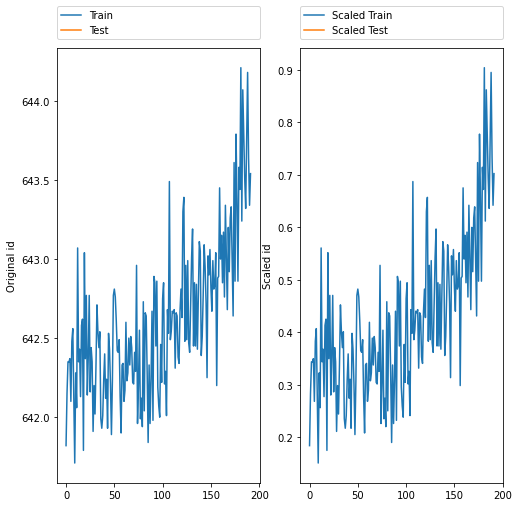

In [23]:
fig = plt.figure(figsize = (8, 8))
fig.add_subplot(1,2,1)
plt.plot(data_train[data_train.id==1].s2)
plt.plot(data_test[data_test.id==1].s2)
plt.legend(['Train','Test'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.ylabel('Original id')
fig.add_subplot(1,2,2)
plt.plot(ntrain[ntrain.id==1].s2)
plt.plot(ntest[ntest.id==1].s2)
plt.legend(['Scaled Train','Scaled Test'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.ylabel('Scaled id')
plt.show()

## Fraction time to failure

In [24]:
def fractionTTF(dat,q):
    return(dat.TTF[q]-dat.TTF.min()) / float(dat.TTF.max()-dat.TTF.min())

In [25]:
fTTFz = []
fTTF = []

for i in range(data_train['id'].min(),data_train['id'].max()+1):
    dat=data_train[data_train.id==i]
    dat = dat.reset_index(drop=True)
    for q in range(len(dat)):
        fTTFz = fractionTTF(dat, q)
        fTTF.append(fTTFz)
ntrain['fTTF'] = fTTF

<AxesSubplot:>

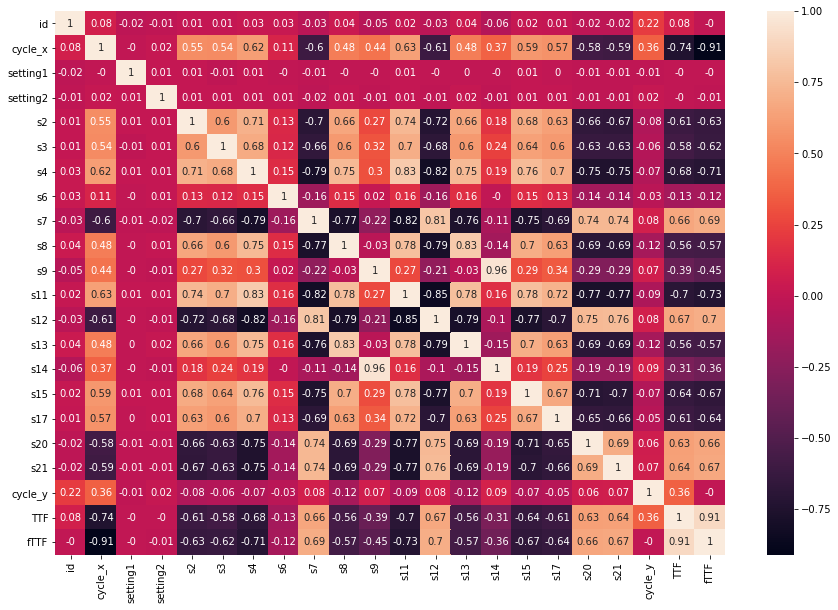

In [26]:
# we create a correlation matrix that measures the linear relationships between the variables.
correlation_matrix = ntrain.corr().round(2)
# annot = True to print the values inside the square
plt.figure(figsize=(15,10))
sns.heatmap(data=correlation_matrix, annot=True, )

In [27]:
col_names_train = ['cycle_x','s2', 's3', 's4',   's7', 's8', 's9',
            's11', 's12', 's13',  's15',  's17',   's20', 's21']
col_names_test = ['cycle','s2', 's3', 's4',   's7', 's8', 's9',
            's11', 's12', 's13',  's15',  's17',   's20', 's21']

In [28]:

X_train = ntrain[col_names_train]
Y_train = ntrain['fTTF']
X_test = ntest[col_names_test]



## Model regression

In [29]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, Y_train)
y_pred = regression.predict(X_test)
y_pred

array([ 0.80609524,  0.69332342,  0.40806256,  0.48776852,  0.53288491,
        0.52791993,  0.39832948,  0.31050928,  0.65636926,  0.27527443,
        0.54567883,  0.20760712,  0.24663067,  0.68492906,  0.68228863,
        0.54192428,  0.30621149,  0.37835945,  0.45371077,  0.13340724,
        0.41150872,  0.75542305,  0.52075058,  0.15753867,  0.72809696,
        0.66328746,  0.43919626,  0.35567885,  0.35085102,  0.38179779,
        0.07796795,  0.39631102,  0.66214518,  0.05111507,  0.05090551,
        0.324122  ,  0.40905797,  0.38296403,  0.80028116,  0.31043543,
        0.42230045,  0.23835767,  0.26920621,  0.67093794,  0.32795797,
        0.32307059,  0.62481572,  0.60351238, -0.21094562,  0.63259472,
        0.41203584,  0.17786855,  0.24636943,  0.57378171,  0.54347595,
        0.28870053,  0.34860526,  0.22328087,  0.64644633,  0.4063642 ,
        0.26220283,  0.11554374,  0.31591244,  0.25044505,  0.72955439,
        0.22139756,  0.67516176,  0.11060047,  0.69464204,  0.37

In [30]:
print(y_pred.min(), y_pred.max())

-0.2109456201783908 0.80609523553993


In [31]:
data_test = pd.merge(data_test, data_test.groupby('id', as_index=False)['cycle'].max(), how='left', on='id')

In [32]:
data_test.rename(columns={"cycles_x": "cycle", "cycle_y": "maxcycles"}, inplace=True)

In [33]:
data_test['score'] = y_pred

In [34]:
data_test.head()

,id,cycle_x,setting1,setting2,s2,s3,s4,s6,s7,s8,...,s11,s12,s13,s14,s15,s17,s20,s21,maxcycles,score
0,1,31,-0.0006,0.0004,642.58,1581.22,1398.91,21.61,554.42,2388.08,...,47.23,521.79,2388.06,8130.11,8.4024,393,38.81,23.3552,31,0.806095
1,2,49,0.0018,-0.0001,642.55,1586.59,1410.83,21.61,553.52,2388.10,...,47.67,521.74,2388.09,8126.90,8.4505,391,38.81,23.2618,49,0.693323
2,3,126,-0.0016,0.0004,642.88,1589.75,1418.89,21.61,552.59,2388.16,...,47.88,520.83,2388.14,8131.46,8.4119,395,38.93,23.2740,126,0.408063
3,4,106,0.0012,0.0004,642.78,1594.53,1406.88,21.61,552.64,2388.13,...,47.65,521.88,2388.11,8133.64,8.4634,395,38.58,23.2581,106,0.487769
4,5,98,-0.0013,-0.0004,642.27,1589.94,1419.36,21.61,553.29,2388.10,...,47.46,521.00,2388.15,8125.74,8.4362,394,38.75,23.4117,98,0.532885


In [35]:
def totcycles(data):
    return(data['cycle_x'] / (1-data['score']))
    
data_test['maxpredcycles'] = totcycles(data_test)

In [36]:
data_test['maxpredcycles'].head()

0    159.872297
1    159.777443
2    212.860334
3    206.937690
4    209.798404
Name: maxpredcycles, dtype: float64

In [37]:
def RULfunction(data):
    return(data['maxpredcycles'] - data['maxcycles'])

data_test['RUL'] = RULfunction(data_test)

In [38]:
predictedRUL = data_test['RUL']
predictedRUL[0:10]

0    128.872297
1    110.777443
2     86.860334
3    100.937690
4    111.798404
5    117.419898
6    105.926274
7     74.757410
8    105.055530
9     72.927869
Name: RUL, dtype: float64

In [39]:
len(predictedRUL)

100

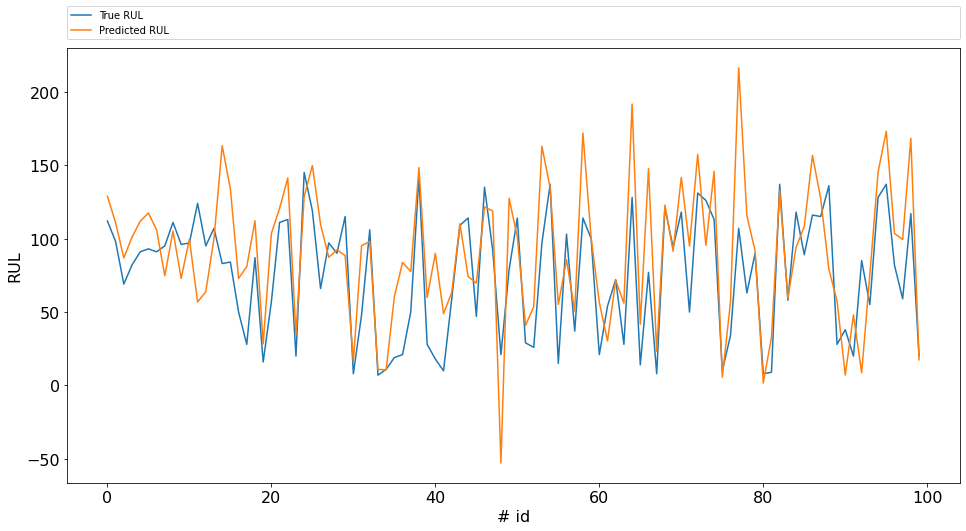

In [40]:
plt.figure(figsize = (16, 8))
plt.plot(RUL)
plt.plot(predictedRUL)
plt.xlabel('# id', fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('RUL', fontsize=16)
plt.yticks(fontsize=16)
plt.legend(['True RUL','Predicted RUL'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.show()

In [41]:
xpredictedRUL = list(round(x) for x in predictedRUL)
opredictedRUL = []

for i in range(0,len(xpredictedRUL)):
    opredictedRUL = np.concatenate((opredictedRUL, list(reversed(np.arange(xpredictedRUL[i])))))

In [42]:
diff= xpredictedRUL - RUL
df2 = pd.DataFrame({'reality': RUL, 'predict': xpredictedRUL,'difference':diff})
df2.head(20)

,reality,predict,difference
0,112,129,17
1,98,111,13
2,69,87,18
3,82,101,19
4,91,112,21
5,93,117,24
6,91,106,15
7,95,75,-20
8,111,105,-6
9,96,73,-23


In [43]:
from sklearn.metrics import mean_squared_error
print('MSE on train set:', mean_squared_error(Y_train,regression.predict(X_train)))
print('RMSE on train set:', np.sqrt(mean_squared_error(Y_train,regression.predict(X_train))/Y_train.shape[0]))

print('MSE on test set:', mean_squared_error(RUL,xpredictedRUL))
print('RMSE on test set:', np.sqrt(mean_squared_error(RUL,xpredictedRUL)))

MSE on train set: 0.010616891288541746
RMSE on train set: 0.0007173622942190788
MSE on test set: 1224.26
RMSE on test set: 34.989426974444726
